# Problem 1

## Problem 1: Part 1

In [2]:
import numpy as np
import math


y = np.array([-1,-1,-1,-1,-1,1,1,1,1,-1])

features = {
    "know author": np.array([0,1,0,1,0,1,0,1,1,1]),
    "is long": np.array([0,1,1,1,1,0,0,0,0,1]),
    "has research": np.array([1,0,1,1,0,1,1,0,1,1]),
    "has grade": np.array([1,1,1,1,0,1,0,0,1,1]),
    "has lottery": np.array([0,0,1,0,0,1,0,0,0,1])
}


# Create a 2D array for all the data
email_data = np.zeros((len(features["know author"]),len(features)+1))

# populate feature data
email_data[:,0] = features["know author"]
email_data[:,1] = features["is long"]    
email_data[:,2] = features["has research"]
email_data[:,3] = features["has grade"]
email_data[:,4] = features["has lottery"]

# populate class data
email_data[:,-1] = y


assert len(y) == 10


p_read = np.count_nonzero(y == 1) / len(y)
p_not_read = np.count_nonzero(y== -1) / len(y)

entropy_y = - p_read * np.log(p_read) - p_not_read * np.log(p_not_read)

print(f"entropy = {entropy_y}")

entropy = 0.6730116670092565


## Problem 1 - Part 2

In [3]:
from utils.infogains import InfoGains

In [4]:
import mltools as ml
my_gains = InfoGains(email_data[:,:-1], email_data[:,-1])

info_gains = my_gains.calc_all_info_gain()

for index,info_gain in enumerate(info_gains):
    print(f"Info gain for feature {index+1} = {info_gain}")
    




Info gain for feature 1 = 0.0464393446710154
Info gain for feature 2 = 0.6099865470109874
Info gain for feature 3 = 0.0058021490143456145
Info gain for feature 4 = 0.0912774462416801
Info gain for feature 5 = 0.0058021490143456145


Split on feature 2 -- highest info gain.

## Problem 1 - Part 3

In [5]:
learner = ml.dtree.treeClassify(email_data[:,:-1], email_data[:,-1], maxDepth=50)

print(learner.str_long())

  if x[1] < 0.500000:
    if x[0] < 0.500000:
      if x[3] < 0.500000:
        Predict [0.25 0.75]
      else:
        Predict [0.75 0.25]
    else:
      Predict [0.125 0.875]
  else:
    Predict [0.91666667 0.08333333]



Explanation: Each split is fairly accurate (due to not a lot of data). This is why we see a shallow depth and, more noticeable, else statements that do not contain another split.

# Problem 2

## Problem 2 - Part 1

In [227]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
X = X[:,41:69] #only taking first 41, maybe deal with the other values later(categorical, binary)

[Xtr, Xva, Ytr, Yva] = ml.splitData(X,Y,0.70) #70% training, 30% validation


for feature_index in range(20):
    print(f"Mean for feature {feature_index + 1} = {X[:,feature_index].mean()}")
    print(f"Minimum for feature {feature_index + 1} = {X[:,feature_index].min()}")
    print(f"Maximum for feature {feature_index + 1} = {X[:,feature_index].max()}")
    print(f"Variance for feature {feature_index + 1} = {X[:,feature_index].var()}")


Mean for feature 1 = 174.32655260676276
Minimum for feature 1 = 0.0
Maximum for feature 1 = 361.0
Variance for feature 1 = 11400.577183952742
Mean for feature 2 = 21.19479994611343
Minimum for feature 2 = 0.0
Maximum for feature 2 = 50.0
Variance for feature 2 = 103.20764101817595
Mean for feature 3 = 21.552741479186313
Minimum for feature 3 = 0.0
Maximum for feature 3 = 22.0
Variance for feature 3 = 6.145642154236639
Mean for feature 4 = 0.02626970227670753
Minimum for feature 4 = 0.0
Maximum for feature 4 = 3.0
Variance for feature 4 = 0.07731071104082472
Mean for feature 5 = 103.46275090933585
Minimum for feature 5 = 0.0
Maximum for feature 5 = 225.0
Variance for feature 5 = 5086.604533291988
Mean for feature 6 = 2202.6376128250035
Minimum for feature 6 = 5.0
Maximum for feature 6 = 4290.0
Variance for feature 6 = 1449485.503594032
Mean for feature 7 = 2482.7142664690828
Minimum for feature 7 = 0.0
Maximum for feature 7 = 5072.0
Variance for feature 7 = 1928110.9695485895
Mean for f

## Problem 2 - Part 2

In [228]:
import matplotlib.pyplot as plt

def mse(y_true: np.array, y_hat: np.array) -> float:
    squared = (y_true - y_hat)**2
    # print(squared)
    return np.mean(squared)


learner = ml.dtree.treeClassify(Xtr, Ytr,  minParent = 50, minLeaf = 5, maxDepth=50)
Ytr_hat = learner.predict(Xtr)
Yva_hat = learner.predict(Xva)

err_train = mse(Ytr, Ytr_hat)
err_validate = mse(Yva, Yva_hat)

print(f"Training error = {err_train}")
print(f"Validation error = {err_validate}")


Training error = 0.2557736720554272
Validation error = 0.46519982038616975


## Problem 2 - Part 3

In [235]:
depths = 16

training_error_rates = np.zeros(depths)
validation_error_rates = np.zeros(depths)

for max_depth in range(depths):
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent = 10, maxDepth=max_depth)
    #Ytr_hat = learner.predict(Xtr)
    #Yva_hat = learner.predict(Xva)

    err_train = learner.auc(Xtr,Ytr) #mse(Ytr, Ytr_hat)
    err_validate = learner.auc(Xva, Yva) #mse(Yva, Yva_hat)
    
    # save error rates
    training_error_rates[max_depth] = err_train
    validation_error_rates[max_depth] = err_validate

    # print(f"Training error = {err_train}")
    # print(f"Validation error = {err_validate}")



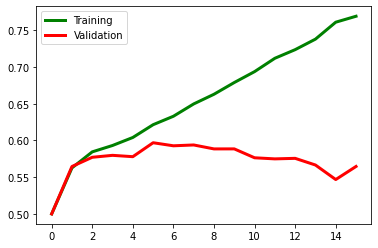

In [236]:
fig, ax = plt.subplots(1,1)


depths_arr = np.arange(0, depths)
ax.plot(depths_arr, training_error_rates, "g-", lw=3, label = "Training")
ax.plot(depths_arr, validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.show()

Higher max depth means higher complexity. The best max depth is 7 according to this graph

## Problem 2 - Part 4

In [251]:

min_parents = np.logspace(0,13,num=13,base=2,dtype='int')
min_parents_training_error_rates = np.zeros(len(min_parents))
min_parents_validation_error_rates = np.zeros(len(min_parents))




for index,min_parent in enumerate(min_parents):
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=min_parent, minLeaf=30, maxDepth=100)
    #Ytr_hat = learner.predict(Xtr)
    #Yva_hat = learner.predict(Xva)

    err_train = learner.auc(Xtr,Ytr) #mse(Ytr, Ytr_hat)
    err_validate = learner.auc(Xva, Yva) #mse(Yva, Yva_hat)
    
    # save error rates
    min_parents_training_error_rates[index] = err_train
    min_parents_validation_error_rates[index] = err_validate
    
    #print(err_validate)



[0.57060864 0.57074059 0.57133496 0.57060864 0.57133496 0.57060864
 0.57464858 0.59782016 0.60960952 0.61666247 0.60153568 0.59416718
 0.5       ]


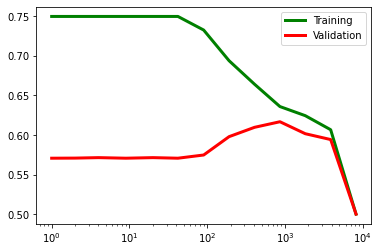

In [252]:

print(min_parents_validation_error_rates)
fig, ax = plt.subplots(1,1)


ax.semilogx(min_parents, min_parents_training_error_rates, "g-", lw=3, label = "Training")
ax.semilogx(min_parents, min_parents_validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.show()

Higher `minParent` yields lower complexity because more data is "grouped" together due to a higher number of data required to split nodes. The best `minParent` is around 700.  

## Problem 2 - Part 5

In [255]:
min_leaves = np.logspace(0,13,num=13,base=2,dtype='int')
min_leaves_training_error_rates = np.zeros(len(min_leaves))
min_leaves_validation_error_rates = np.zeros(len(min_leaves))




for index,min_leaf in enumerate(min_leaves):
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent = 10, minLeaf=min_leaf, maxDepth=100)
    #Ytr_hat = learner.predict(Xtr)
    #Yva_hat = learner.predict(Xva)

    err_train = learner.auc(Xtr,Ytr) #mse(Ytr, Ytr_hat)
    err_validate = learner.auc(Xva, Yva) #mse(Yva, Yva_hat)
    
    # save error rates
    min_leaves_training_error_rates[index] = err_train
    min_leaves_validation_error_rates[index] = err_validate





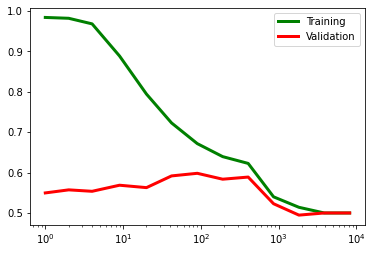

In [256]:
fig, ax = plt.subplots(1,1)


ax.semilogx(min_leaves, min_leaves_training_error_rates, "g-", lw=3, label = "Training")
ax.semilogx(min_leaves, min_leaves_validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.show()

Complexity control for `minLeaf` appears to be similar to `minParent`. 50 or 500

## Problem 2 - Part 6

In [14]:
max_depth_learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=1,maxDepth=6)
min_parent_learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=406,maxDepth=50)
min_leaf_learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=1,minLeaf=90, maxDepth=50)
learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=406, minLeaf=90, maxDepth=6)


depth_fpr_training,depth_tpr_training,depth_tnr_training = max_depth_learner.roc(Xtr,Ytr)
depth_fpr_validation,depth_tpr_validation,depth_tnr_validation = max_depth_learner.roc(Xva,Yva)

parent_fpr_training,parent_tpr_training,parent_tnr_training = min_parent_learner.roc(Xtr,Ytr)
parent_fpr_validation,parent_tpr_validation,parent_tnr_validation = min_parent_learner.roc(Xva,Yva)

leaf_fpr_training,leaf_tpr_training,leaf_tnr_training = min_leaf_learner.roc(Xtr,Ytr)
leaf_fpr_validation,leaf_tpr_validation,leaf_tnr_validation = min_leaf_learner.roc(Xva,Yva)

fpr_training,tpr_training,tnr_training = learner.roc(Xtr,Ytr)
fpr_validation,tpr_validation,tnr_validation = learner.roc(Xva,Yva)


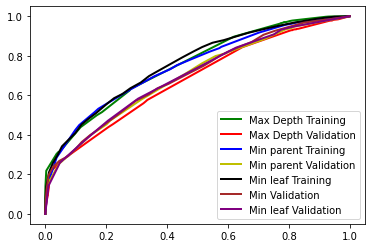

max depth auc training 0.7595318807456648
max depth auc validation 0.6826305897526769
min parent auc training 0.7475297125483692
min parent auc validation 0.6971685945515707
min leaf auc training 0.7582676312647779
min leaf auc validation 0.6986374569348663
min auc training 0.7195063141342772
min auc validation 0.6983657035956845


In [15]:

fig, ax = plt.subplots(1,1)


ax.plot(depth_fpr_training, depth_tpr_training, "g-", lw=2, label = "Max Depth Training")
ax.plot(depth_fpr_validation, depth_tpr_validation, "r-", lw=2, label = "Max Depth Validation")

ax.plot(parent_fpr_training, parent_tpr_training, "b-", lw=2, label = "Min parent Training")
ax.plot(parent_fpr_validation, parent_tpr_validation, "y-", lw=2, label = "Min parent Validation")


ax.plot(leaf_fpr_training, leaf_tpr_training, "black", lw=2, label = "Min leaf Training")
ax.plot(leaf_fpr_validation, leaf_tpr_validation, "brown", lw=2, label = "Min Validation")

ax.plot(fpr_validation, tpr_validation, "purple", lw=2, label = "Min leaf Validation")

plt.legend()
plt.show()

print(f"max depth auc training {max_depth_learner.auc(Xtr,Ytr)}")
print(f"max depth auc validation {max_depth_learner.auc(Xva,Yva)}")
print(f"min parent auc training {min_parent_learner.auc(Xtr,Ytr)}")
print(f"min parent auc validation {min_parent_learner.auc(Xva,Yva)}")
print(f"min leaf auc training {min_leaf_learner.auc(Xtr,Ytr)}")
print(f"min leaf auc validation {min_leaf_learner.auc(Xva,Yva)}")
print(f"min auc training {learner.auc(Xtr,Ytr)}")
print(f"min auc validation {learner.auc(Xva,Yva)}")

#print(f"min err for maxDepth {depths_arr[validation_error_rates == validation_error_rates.min()]}")
#print(f"min err for minParent {min_parents[min_parents_validation_error_rates == min_parents_validation_error_rates.min()]}")
#print(f"min err for minLeaf {min_leaves[min_leaves_validation_error_rates == min_leaves_validation_error_rates.min()]}")




## Problem 2 - Part 7

In [223]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
X = X[:,41:69] #only taking first 41, maybe deal with the other values later(categorical, binary)

[Xtr, Xva, Ytr, Yva] = ml.splitData(X,Y,0.70) #70% training, 30% validation

final_learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=100, minLeaf=90, maxDepth=7)

#fig, ax = plt.subplots(1,1)


#ax.plot(depth_fpr_training, depth_tpr_training, "g-", lw=2, label = "Training")
#ax.plot(depth_fpr_validation, depth_tpr_validation, "r-", lw=2, label = "Validation")

#plt.legend()
#plt.show()

print(f"auc training {final_learner.auc(Xtr,Ytr)}")
print(f"auc validation {final_learner.auc(Xva,Yva)}")

auc training 0.7313017089329914
auc validation 0.7103476507360355


In [224]:


Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Yte = np.vstack((np.arange(Xte.shape[0]), final_learner.predictSoft(Xte)[:,1])).T

np.savetxt('Y_submit.txt', Yte,'%d, %.2f', header='Id,Predicted', delimiter=',')

Performance on Kaggle: 0.70720

# Problem 3

## Problem 3 - Part 1

In [4]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')

X_numeric = X[:,41]
X_discrete = X[:,41:69]
X_binary = X[:,69:-1]

X,Y = ml.shuffleData(X,Y)



Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)


In [12]:
class BaggedTree(ml.base.classifier):
    def __init__(self, learners):
        """Constructs a BaggedTree class with a set of learners. """
        self.learners = learners
    
    def predictSoft(self, X):
        """Predicts the probabilities with each bagged learner and average over the results. """
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)

bootstrap_sample_size = 50

m,n = Xtr.shape

bag_numbers = np.array([5,10])

#ensemble_predictions = np.zeros(len(bag_numbers))

ensemble_training_errors = np.zeros(len(bag_numbers))
ensemble_validation_errors = np.zeros(len(bag_numbers))

for predictions_index, num_bags in enumerate(bag_numbers):
    num_numeric_learners = int(round(num_bags / 1.5))
    num_discrete_learners = int(round(num_bags / 5))
    num_binary_learners = int(round(num_bags / 5))
    
    # update num bags based on number of learners 
    # (only slight deviation based on the algorithm and rounding)
    num_bags = num_numeric_learners + num_discrete_learners + num_binary_learners
    
    print(f"# of numeric learners = {num_numeric_learners}")
    print(f"# of discrete learners = {num_discrete_learners}")
    print(f"# of binary learners = {num_binary_learners}")
    
    
    classifiers = [None]*num_bags
    
    # keep track of which number classifier we are on
    classifiers_index = 0
    
    for i in range(num_numeric_learners):
        #print("classifier index", classifiers_index)
        Xi,Yi = ml.bootstrapData(Xtr, Ytr)
        
        # insert classifier into list
        classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=400, minLeaf=100, maxDepth=50)
        classifiers_index += 1
        
    for i in range(num_discrete_learners):
        #print("classifier index", classifiers_index)
        Xi,Yi = ml.bootstrapData(Xtr, Ytr)
        
        # insert classifier into list
        classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=300, minLeaf=100, maxDepth=10)
        classifiers_index += 1

    for i in range(num_binary_learners):
        #print("classifier index", classifiers_index)
        Xi,Yi = ml.bootstrapData(Xtr, Ytr)
        
        # insert classifier into list
        classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=16, minLeaf=50, maxDepth=10)
        classifiers_index += 1
        
        
    print(classifiers)

    bagged_tree = BaggedTree(classifiers)
    bagged_tree.classes = np.unique(Y)
    ensemble_training_errors[predictions_index] = bagged_tree.err(Xtr,Ytr)
    ensemble_validation_errors[predictions_index] = bagged_tree.err(Xva,Yva)
    

    


# of numeric learners = 3
# of discrete learners = 1
# of binary learners = 1
classifier index 0
classifier index 1
classifier index 2
classifier index 3
classifier index 4
[Thresholds: [-29.00, 250.16 ... 0.00, 0.00], Thresholds: [-29.00, 241.68 ... 0.00, 0.00], Thresholds: [-29.00, 242.24 ... 0.00, 0.00], Thresholds: [-29.00, 251.48 ... 0.00, 0.00], Thresholds: [-29.00, 229.09 ... 0.00, 0.00]]
# of numeric learners = 7
# of discrete learners = 2
# of binary learners = 2
classifier index 0
classifier index 1
classifier index 2
classifier index 3
classifier index 4
classifier index 5
classifier index 6
classifier index 7
classifier index 8
classifier index 9
classifier index 10
[Thresholds: [-29.00, 251.48 ... 0.00, 0.00], Thresholds: [-29.00, 242.04 ... 0.00, 0.00], Thresholds: [-29.00, 241.68 ... 0.00, 0.00], Thresholds: [-29.00, 241.68 ... 0.00, 0.00], Thresholds: [-29.00, 251.48 ... 0.00, 0.00], Thresholds: [-29.00, 250.16 ... 0.00, 0.00], Thresholds: [-29.00, 251.48 ... 0.00, 0.00

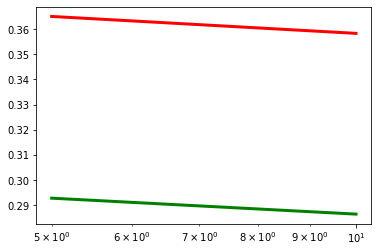

In [13]:
fig, ax = plt.subplots(1,1)

ax.semilogx(bag_numbers, ensemble_training_errors, "g-", lw=3, label = "Training")
ax.semilogx(bag_numbers, ensemble_validation_errors, "r-", lw=3, label = "Validation")


plt.show()

## Problem 3 - Part 2

In [21]:
Xtr_kaggle = np.genfromtxt('data/X_train.txt', delimiter=',')
Ytr_kaggle = np.genfromtxt('data/Y_train.txt', delimiter=',')

Xtr_kaggle = Xtr_kaggle[:,:41]

Xtr_kaggle,Ytr_kaggle = ml.shuffleData(Xtr_kaggle,Ytr_kaggle)

final_num_bags = 50
final_classifiers = [None]*final_num_bags

for i in range(final_num_bags):
    Xi,Yi = ml.bootstrapData(Xtr_kaggle, Ytr_kaggle)
    classifiers[i] = ml.dtree.treeClassify(Xi, Yi, minParent=2**6, minLeaf=4, maxDepth=20)


kaggle_bagged_tree = BaggedTree(classifiers)
kaggle_bagged_tree.classes = np.unique(Ytr_kaggle)



In [ ]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Yte_ensemble = np.vstack((np.arange(Xte.shape[0]), kaggle_bagged_tree.predictSoft(Xte)[:,1])).T

np.savetxt('Y_submit_ensemble.txt', Yte,'%d, %.2f', header='Id,Predicted', delimiter=',')

Performance on Kaggle: 0.69596

# Problem 4

Talked with Patrick Lee and Corey Tan to better understand how ensembles work, as well as documentation for `dtree`